<a href="https://colab.research.google.com/github/Tahan402/DailyPractice/blob/main/LG_Fuel_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
#upload the dataset
from google.colab import files
data_to_load= files.upload()

Saving FuelConsumption_Train.csv to FuelConsumption_Train.csv


In [4]:
import io 
fc_data = pd.read_csv(io.BytesIO(data_to_load['FuelConsumption_Train.csv']))

In [5]:
#checking the data
fc_data.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
2,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
3,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
4,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
5,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
6,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212
7,2014,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225
8,2014,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
9,2014,ASTON MARTIN,RAPIDE,SUBCOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359


Output Varirable(y)

*   CO2EMISSIONS

Through this model, we predict CO2 emissions through different types of car models.


In [6]:
#Checking number of rows and column
fc_data.shape

(831, 13)

There are 831 rows and 13 columns in the data set

In [7]:
#information about each column
fc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 831 non-null    int64  
 1   MAKE                      831 non-null    object 
 2   MODEL                     831 non-null    object 
 3   VEHICLECLASS              831 non-null    object 
 4   ENGINESIZE                831 non-null    float64
 5   CYLINDERS                 831 non-null    int64  
 6   TRANSMISSION              831 non-null    object 
 7   FUELTYPE                  831 non-null    object 
 8   FUELCONSUMPTION_CITY      831 non-null    float64
 9   FUELCONSUMPTION_HWY       831 non-null    float64
 10  FUELCONSUMPTION_COMB      831 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  831 non-null    int64  
 12  CO2EMISSIONS              831 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 84.5+ KB


Inference:


There are some columns which are object data types, meaning they are not continuous data and there are no null values present in the dataset.

In [8]:
#dataset numeric details
fc_data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,831.0,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000
mean,2014.0,3.341877,5.801444,13.289651,9.469434,11.575451,26.490975,255.646209
std,0.0,1.427274,1.838097,4.111285,2.823384,3.503643,7.539429,63.984863
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.100000,7.400000,8.900000,21.000000,205.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,250.000000
75%,2014.0,4.300000,8.000000,15.600000,10.900000,13.400000,32.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
fc_data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

Build a multiple liner regression model with continuous data.

In [10]:
lm = smf.ols(formula = 'CO2EMISSIONS ~ ENGINESIZE + CYLINDERS + FUELCONSUMPTION_CITY + FUELCONSUMPTION_HWY + FUELCONSUMPTION_COMB + FUELCONSUMPTION_COMB_MPG' , data=fc_data).fit()

In [11]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1110.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        07:58:23   Log-Likelihood:                -3717.6
No. Observations:                 831   AIC:                             7449.
Df Residuals:                     824   BIC:                             7482.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Adjusted R-squared = 89%, indicating that there is a high level of correlation between the columns

he condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems

In [13]:
corr_data = fc_data.corr()
corr_data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934847,0.838987,0.781835,0.824750,-0.819470,0.882876
CYLINDERS,NaN,0.934847,1.000000,0.802596,0.726598,0.781285,-0.775583,0.856459
FUELCONSUMPTION_CITY,NaN,0.838987,0.802596,1.000000,0.965754,0.995513,-0.939363,0.897227
FUELCONSUMPTION_HWY,NaN,0.781835,0.726598,0.965754,1.000000,0.985879,-0.898379,0.860930
FUELCONSUMPTION_COMB,NaN,0.824750,0.781285,0.995513,0.985879,1.000000,-0.932029,0.891224
FUELCONSUMPTION_COMB_MPG,NaN,-0.819470,-0.775583,-0.939363,-0.898379,-0.932029,1.000000,-0.904220
CO2EMISSIONS,NaN,0.882876,0.856459,0.897227,0.860930,0.891224,-0.904220,1.000000


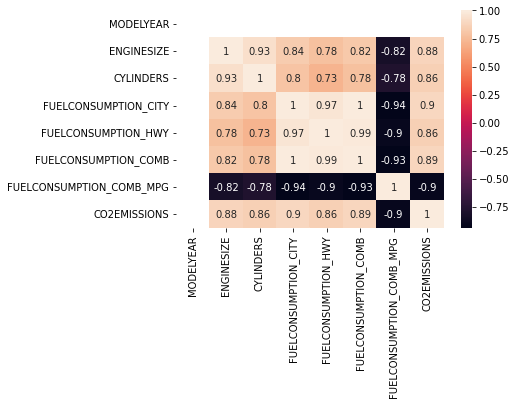

In [14]:
import seaborn as sns
corr_data = fc_data.corr()
sns.heatmap(corr_data,annot=True)
plt.show()

Because of multicollerinity adjusted r square  is inflated

after correlation between cylinders and engine size we use either one of them and build a model

and same between fuelcomsumption_city,fuelconsumption_hwy and fuelconsumption_comb we use one of them because they are corelated to each other

In [16]:
#Using backward elimination - in every itretion we drop not significant value or column
lm1 = smf.ols(formula = 'CO2EMISSIONS ~  CYLINDERS + FUELCONSUMPTION_COMB + FUELCONSUMPTION_COMB_MPG' , data=fc_data).fit()

In [17]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     2089.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:15:05   Log-Likelihood:                -3741.5
No. Observations:                 831   AIC:                             7491.
Df Residuals:                     827   BIC:                             7510.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [18]:
lm1.pvalues

Intercept                   1.496511e-51
CYLINDERS                   7.482857e-64
FUELCONSUMPTION_COMB        9.931875e-10
FUELCONSUMPTION_COMB_MPG    1.284701e-34
dtype: float64

In [20]:
lm2 = smf.ols(formula = 'CO2EMISSIONS ~ ENGINESIZE + CYLINDERS + FUELCONSUMPTION_COMB_MPG' , data=fc_data).fit()

In [21]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     2106.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:27:26   Log-Likelihood:                -3738.6
No. Observations:                 831   AIC:                             7485.
Df Residuals:                     827   BIC:                             7504.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

done is for continuous variable 

In [22]:
fc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 831 non-null    int64  
 1   MAKE                      831 non-null    object 
 2   MODEL                     831 non-null    object 
 3   VEHICLECLASS              831 non-null    object 
 4   ENGINESIZE                831 non-null    float64
 5   CYLINDERS                 831 non-null    int64  
 6   TRANSMISSION              831 non-null    object 
 7   FUELTYPE                  831 non-null    object 
 8   FUELCONSUMPTION_CITY      831 non-null    float64
 9   FUELCONSUMPTION_HWY       831 non-null    float64
 10  FUELCONSUMPTION_COMB      831 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  831 non-null    int64  
 12  CO2EMISSIONS              831 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 84.5+ KB


In [23]:
#MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE ALL are discreate data set lets convert them dummy variables


In [24]:
#MAKE COLUMN
fc_data['MAKE'].value_counts()

CHEVROLET        74
FORD             68
MERCEDES-BENZ    52
BMW              47
TOYOTA           38
VOLKSWAGEN       35
GMC              35
AUDI             33
PORSCHE          33
DODGE            30
MINI             28
JEEP             26
KIA              25
CADILLAC         24
MAZDA            23
NISSAN           23
HYUNDAI          20
JAGUAR           17
INFINITI         16
HONDA            16
CHRYSLER         16
BUICK            16
LEXUS            15
SUBARU           15
MITSUBISHI       14
LAND ROVER       13
LINCOLN          10
FIAT             10
RAM               9
ACURA             8
SCION             7
VOLVO             7
ASTON MARTIN      7
BENTLEY           7
ROLLS-ROYCE       6
MASERATI          3
LAMBORGHINI       3
SMART             1
SRT               1
Name: MAKE, dtype: int64